# Resumo de Ciência dos Dados

<a id="topo"></a>

# Sumário

[1. Teorema do Limite Central](#section1)    

[2. Teste de Hipóteses](#section2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. $\sigma$ conhecido](#section2.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. $\sigma$ desconhecido](#section2.2)  

[3. Intervalo de Confiança](#section3)  

[4. Bootstrapping](#section4)  

[5. Teste de Permutação](#section5) 

[6. Regressão Linear](#section6)  
&nbsp;&nbsp;&nbsp;&nbsp;[6.1. Regressão Simples](#section6.1)     
&nbsp;&nbsp;&nbsp;&nbsp;[6.2. Regressão Múltipla](#section6.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[6.3. Dados da Tabela](#section6.3)  

[Links adicionais](#links)  

# Imports

In [1]:
from scipy.stats import norm, t, percentileofscore
from math import sqrt
from numpy import mean, std, var, random, percentile, array
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

<a id = "section1"></a>

## 1. Teorema do Limite Central - Aula 15

O Teorema do Limite Central diz que para um número de amostras $n$ suficientemente grande, a distribuição da média destas amostras se aproxima de uma normal.

[Voltar para o sumário](#topo)

<a id = "section2"></a>

## 2. Teste de Hipóteses - Aula 19

Um teste de hipótese serve para testar uma hipótese proposta alternativa ($H_A$) à uma hipótese chamada de hipótese nula ($H_0$). Para fazer o teste, deve-se seguir alguns passos:

1. Fixar a hipótese nula $H_0$ e a hipótese alternativa $H_A$.
2. Definir a estatística utilizada para julgar a hipótese $H_0$. (Geralmente usamos $\overline{x}$ e a distribuição de $\overline{X}$ para tentar inferir algo sobre os valores da população de $X$.)
3. Decida o $\alpha$ a utilizar e defina a Região Crítica segundo $H_0$. 
    * $\alpha$ é a probabilidade de rejeitar $H_0$ mesmo que ela seja verdadeira.
    * $\alpha$ é chamado de nível de significância.
    * Geralmente fixa-se $\alpha$ em 1%, 5% ou 10%.
    * 1 - $\alpha$ é chamado de nível de confiança.
4. Calcule a estatística da amostra. (Novamente, usa-se $\bar{x}$ em geral.)
5. Se a estatística da amostra estiver na região crítica, rejeite $H_0$, caso contrário, **não rejeite $H_0$**. (nunca aceite!)

### Valor-p

O valor *$p$* é a probabilidade de obter um resultado **igual ao da amostra ou mais extremo**, se $H_0$ for verdadeira.

### Erros tipo 1 e tipo 2

<img src = "erros.PNG" style = "width: 50%; height: 50%">

<a id = "section2.1"></a>

### 2.1 - $\sigma$ conhecido

Quando se sabe o desvio padrão das amostras, obtém se $\sigma_{\bar{x}}$ usando a fórmula

\begin{equation}
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
\end{equation}

onde $\sigma$ é o desvio padrão e $n$ é o número de amostras.

A partir disso, pode-se simplesmente usar uma normal para analisar a distribuição de $\bar{X}$, onde o loc é $\bar{x}$ e o scale é $\sigma_{\bar{x}}$.

$\Large \textbf{Exemplo}$

$\large \textbf{APS 6 - Questão 2}$

A vida útil medida em horas de um termopar usado num forno é distribuída de forma normal, com desvio padrão de 20 horas. Uma amostra aleatória de 15 termopares resultou nos seguintes dados: 553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529.

$\textbf{a.}$ Existe evidência para suportar a alegação de que a vida média exceda 540 horas? Use um nível de significância de 0.05.

$\normalsize \textbf{Resolução do item a}$

Para descobrir se existe evidência para suportar tal alegação, precisamos montar um teste de hipótese. Primeiro, devemos determinar a hipótese nula e a alternativa:

$ H_0 \colon \ \mu = 540 \\ H_A \colon \ \mu > 540 \\ $

Em seguida, devemos definir a estatística a ser utilizada. No caso, usaremos $\bar{x}$ e a distribuição de $\bar{X}$.

O próximo passo é definir a região crítica. Para tal, analisaremos a hipótese $H_A$. Como ela diz que $\mu > 540$, o teste é unicaudal, e a região crítica se encontra à direita de $\mu_0 = 540$. Para defini-la, devemos descobrir qual ponto cuja área à direita é igual à 5% (significância definida pelo enunciado), e pode-se fazer isto através da função norm.ppf(). Vale notar que definimos a distribuição de $\bar{X}$ como normal pois temos o desvio padrão.

In [2]:
am1 = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
n1 = len(am1)
media1 = mean(am1)
mu = 540
alfa = 0.05
sigma = 20
sigmabarra = 20/sqrt(n1)

xcrit1 = norm.ppf(0.95,mu,sigmabarra)

print(f"A média amostral é {round(media1,3)}.")
print(f"O x crítico deste teste é {round(xcrit1,3)}.")

A média amostral é 551.333.
O x crítico deste teste é 548.494.


Como $\mu_{amostral} > x_{crítico}$, há evidência para suportar a alegação que $\mu > 540$, logo, rejeito $H_0$.

$\textbf{b.}$ Qual o valor P deste teste?

$\normalsize \textbf{Resolução do item b}$

O teste é unicaudal à direita, portanto, para obter o valor P, basta obter a área à direita de $\mu_{amostral}$.

In [3]:
valP1 = norm.sf(media1,mu,sigmabarra)
print(f"O valor P deste teste é {round(valP1*100,3)}%.")

O valor P deste teste é 1.409%.


<a id = "section2.2"></a>

### 2.2 - $\sigma$ desconhecido

Quando não se sabe o $\sigma_x$, trocamos a normal pela chamada t-student para analisar a distribuição de $\bar{X}$ (uma vez que $n$ não é grande o suficiente para usar o TLC). Nela, usa-se o desvio padrão amostral (este calculado pela função `std()` do numpy), e há um novo argumento a ser levado em consideração: os graus de liberade (este dado pelo argumento `df` na distribuição `t`, e como usa-se o desvio padrão amostral, usa-se que `df = n-1`). 

$\Large \textbf{Exemplo}$

$\large \textbf{APS 6 - Questão 3}$

Você foi contratado para avaliar um novo modelo de taco de golfe. O fabricante quer saber se há evidência de que o coeficiente de restituição médio dos tacos excede 0.82 com nível de significância $\alpha = 0.05$. Em um lançador padronizado de bolas de golfe, foram testados 15 tacos e os coeficientes de restituição medidos foram: 0.8411, 0.8191, 0.8182, 0.8125, 0.8580, 0.8532, 0.8483, 0.8276, 0.8042, 0.8730, 0.8282, 0.8359, 0.8750, 0.7983, 0.8660. Sabe-se por experiência anterior que o coeficiente de restituição tem distribuição normal, mas você não sabe o $\sigma$.

Pede-se:

$\textbf{a)}$ Calcule $\bar{x}$ e s (lembre-se dos graus de liberdade).

$\normalsize \textbf{Resolução do item a}$

O $\bar{x}$ é dado pela média amostral dos dados. Já o s é dado pelo desvio padrão amostral dos dados (n-1). Para calculá-los, utilizaremos as funções mean() e std() do módulo numpy.

In [4]:
am2 = [0.8411, 0.8191, 0.8182, 0.8125, 0.8580, 0.8532, 0.8483, 0.8276, 0.8042, 0.8730, 0.8282, 0.8359, 0.8750, 0.7983, 0.8660]
media2 = mean(am2)
#Usamos ddof = 1 pois o desvio padrão é amostral.
s = std(am2, ddof = 1)

print(f"A média é {round(media2,3)} e o desvio padrão s é {round(s,3)}.")

A média é 0.837 e o desvio padrão s é 0.025.


$\textbf{b)}$ Formule as hipóteses nula e alternativa. Responda se o teste de hipótese vai ter região de rejeição bicaudal ou unicaudal.

$\normalsize \textbf{Resposta do item b}$

$ H_0 \colon \ \mu \leq 0.82 \\ H_A \colon \ \mu > 0.82 \\ $

A região de rejeção do teste é unicaudal à direita.

$\textbf{c)}$ Calcule a estatística t de teste para a t padrão usando a relação $t_{obs} = \frac{x_{obs} − \mu_0}{\frac{s}{\sqrt{n}}}$

$\normalsize \textbf{Resolução do item c}$

In [5]:
xobs = media2
mu0 = 0.82
n2 = len(am2)
tobs = (xobs-mu0)/(s/sqrt(n2))

print(f"O t_obs é {round(tobs,3)}.")

O t_obs é 2.719.


$\textbf{d)}$ Calcule o $t_{crítico}$. Compare $t_{obs}$ com $t_{crítico}$ e escreva sua conclusão para o teste de hipóteses.

$\normalsize \textbf{Resolução do item d}$

Para calcular o $t_{crítico}$, deve-se repetir o procedimento para calcular o $x_{crítico}$ feito no item a da questão 2. No entanto, há uma diferença: os dados seguem uma distribuição t-Student. Portanto, alteramos a estatística. Além disto, devemos lembrar que ao calcular $t_{obs}$, padronizamos a distribuição, logo, para calcular o $t_{crítico}$, devem ser usados a média e desvio padrão padrões.

In [6]:
tcrit = t.ppf(0.95, df = n2-1)

print(f"O t_crítico é {round(tcrit,3)}. Como t_obs > t_crítico (uma vez que t_obs = {round(tobs,3)}), deve-se rejeitar H0.")

O t_crítico é 1.761. Como t_obs > t_crítico (uma vez que t_obs = 2.719), deve-se rejeitar H0.


$\textbf{e)}$ Calcule o valor p de $t_{obs}$. Compare o valor p com o $\alpha$. Verifique se sua conclusão do item d continua válida.

$\normalsize \textbf{Resolução do item e}$

Para calcular o valor P de $t_{obs}$, podemos repetir o procedimento feito no item b da questão 2, lembrando somente de usar a distribuição t ao invés da normal.

In [7]:
valP2 = t.sf(tobs,n2-1)
print(f"O valor P de t_obs é {round(valP2*100,3)}%. Como este valor é menor que α (α = {alfa*100}%), a conclusão feita no item d continua válida.")

O valor P de t_obs é 0.831%. Como este valor é menor que α (α = 5.0%), a conclusão feita no item d continua válida.


$\textbf{f)}$ Refaça o teste de hipótese usando a padronização embutida das funções do scipy. Especificamente stats.t.cdf e stats.t.ppf.

$\normalsize \textbf{Resolução do item f}$

A questão pede que seja refeito o teste de hipótese mas sem utilizar a padronização dada por $t_{obs}$. O procedimento é o mesmo que fizemos na questão 2, mas além de alterar para a distribuição t, deve-se utilizar a média $\mu_0 = 0.82$ e devemos ajustar o desvio padrão $s$ para se tornar um $s_{\bar{x}}$.

In [8]:
#Cálculo da região crítica

xcrit2 = t.ppf(0.95,df = n2-1,loc = mu0,scale = s/sqrt(n2))

#Cálculo do valor P

valp = t.sf(media2,df = n2-1,loc = mu0,scale = s/sqrt(n2))

print(f"O x crítico do teste se encontra em x = {round(xcrit2,3)}, e o valor P da média amostral é {round(valp*100,3)}%.")
print(f"Como a média amostral se encontra depois do x crítico (média = {round(media2,3)}) e o valor P é menor que o α (α = {alfa*100}%), rejeita-se H0, o que gera a mesma conclusão dos itens 'e' e 'f'.")

O x crítico do teste se encontra em x = 0.831, e o valor P da média amostral é 0.831%.
Como a média amostral se encontra depois do x crítico (média = 0.837) e o valor P é menor que o α (α = 5.0%), rejeita-se H0, o que gera a mesma conclusão dos itens 'e' e 'f'.


[Voltar para o sumário](#topo)

<a id = "section3"></a>

## 3. Intervalo de Confiança - Aula 21


### Intervalo de confiança para Normal

Vamos definir um nível de confiança $\gamma$. Sejam $-z_{\gamma/2}$ e $z_{\gamma/2}$ os valores que delimitam uma probabilidade $\gamma$ de forma simétrica na curva $\sim N(0,1)$

Temos que:

$P(-z_{\gamma/2} < Z < z_{\gamma/2}) = \gamma$

e

$-z_{\gamma/2} < Z < z_{\gamma/2}$

Podemos nos lembrar da parametrização para curva de médias amostrais:

$Z = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$

Portanto:

$-z_{\gamma/2} < \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}  < z_{\gamma/2}$

Se isolarmos o $\mu$ chegaremos a:

$\overline{X} - z_{\gamma/2} \frac{\sigma}{\sqrt{n}} < \mu < \overline{X} + z_{\gamma/2} \frac{\sigma}{\sqrt{n}}$ 

A inequação acima nos define uma faixa com $\gamma$ de probabilidade de conter $\mu$ . Podemos escrevê-la na forma de um intervalo:

$IC(\mu, \gamma) = [ \overline{X} - z_{\gamma/2} \frac{\sigma}{\sqrt{n}}; \overline{X} + z_{\gamma/2} \frac{\sigma}{\sqrt{n}} ]$


### Erro de estimativa 

Costuma-se usar como estimativa de erro o valor de metade do intervalo de confiança

$E = z_{\gamma/2}\frac{\sigma}{\sqrt{n}}$

Isolando o n temos:

$n = ( z_{\gamma/2} \frac{\sigma}{E} )^2$


### Intervalo de confiança para t


Podemos fazer uma derivação análoga para a distribuição $t$:


$IC(\mu, \gamma) = [ \overline{X} - t_{\gamma/2}^{n-1} \frac{s}{\sqrt{n}}; \overline{X} + t_{\gamma/2}^{n-1} \frac{s}{\sqrt{n}} ]$

[Voltar para o sumário](#topo)

<a id = "section4"></a>

## 4. Bootstrapping - Aula 21

Usa-se bootstrapping quando não se conhece a distribuição de $X_i$ e a distribuição de $\bar{X}$. Este é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Por exemplo, podemos utilizar a média como medida de interesse, mas a distribuição de outras medidas também pode ser estimadas, como por exemplo variância, mediana, kurtosis, etc.

Reamostragem com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido. Seria equivalente a sortear um número e por de volta na urna.

Dado um conjunto com a amostra mestre aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecutivamente, com reposição, conjuntos de tamanho também $n$ dessa amostra amostra mestre. Esses conjuntos são chamados de reamostragem e esse processo deve ser feito milhares de vezes.

A cada reamostragem deve-se aplicar a medida de interesse, nesse caso a média, e guardar em uma lista. Ao fim das milhares de reamostragens, teremos uma distribuição da medida desejada.

De posse desta distribuição, podemos calcular o Intervalo de Confiança através dos seus percentis.

$\Large \textbf{Exemplo}$

$\large \textbf{Aula 21 - Questão 1}$

Dado uma lista 0.69689142, 0.57995802, 0.06450754, 0.61206626, 0.91976314, 0.34363861, 0.82575631, 0.41666036, 0.62153527, 0.56757104, 0.86683518, 0.28922458, 0.28521698, faça a reconstrução de $\bar{X}$ usando bootstrapping.

Algoritmo:

1. Repetir 10000 vezes:
    1. Realizar um sorteio de n números com reposição da amostra mestre. Usar a função choice() do numpy.
    2. Calcular a média da reamostragem e guardar em uma lista.
2. Plotar o histograma da lista.
3. Exibir a média e o desvio padrão dos elementos da lista.

In [9]:
x = [0.69689142, 0.57995802, 0.06450754, 0.61206626, 0.91976314, 0.34363861, 0.82575631, 
     0.41666036, 0.62153527, 0.56757104, 0.86683518, 0.28922458, 0.28521698]

n_vezes = 10000

size = len(x)

medias = []

for i in range(n_vezes):
    x_fake = random.choice(x, size = size, replace=True)
    media = mean(x_fake)
    medias.append(media)
    
media_lista_medias = mean(medias)
variancia_lista_medias = var(medias)
print(f"A média da lista de médias é {round(media_lista_medias,3)} e a variância é {round(variancia_lista_medias,3)}")

A média da lista de médias é 0.546 e a variância é 0.005


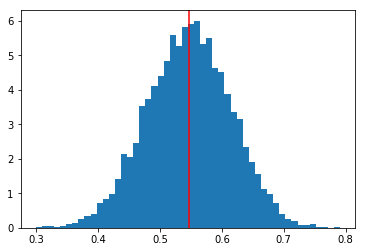

In [10]:
plt.hist(medias, density=True, bins=50);
plt.axvline(media_lista_medias, color="r")
plt.show()

$\large \textbf{Questão 2}$

Montar as hipóteses e o intervalo de confiança de 95% bicaudal. Responder o problema de inferência.

In [11]:
first = percentile(medias, 2.5)
second = percentile(medias, 97.5)
print(f"O intervalo de confiança de 95% bicaudal está definido entre {round(first,3)} e {round(second,3)}. Como a média {round(media_lista_medias,3)} está dentro deste intervalo, não rejeito H0.")

O intervalo de confiança de 95% bicaudal está definido entre 0.413 e 0.677. Como a média 0.546 está dentro deste intervalo, não rejeito H0.


[Voltar para o sumário](#topo)

<a id = "section5"></a>

## 5. Teste de Permutação - Aula 22

$\large \textbf{Exercício 1}$

Uma fábrica realizou uma calibração em uma máquina na linha de produção. A equipe que realizou os ajustes afirmou que após a calibração, a máquina ainda manteve o mesmo tempo médio de produção. Para verificar se realmente o tempo médio permaneceu inalterado, foram realizadas duas medidas de tempo: uma antes e uma depois da calibração.

Foram selecionadas 7 e 8 peças aleatorianente para as medidas antes e depois da calibração, repectivamente. Elas estão representadas abaixo pelas séries xA e xB, respectivamente.

Assuma que o tempo de produção de uma peça possui uma distribuição normal e que o desvio padrão realmente permaneceu inalterado, contudo desconhecido.

In [12]:
xA = [47.66708824, 48.11337801, 47.83104582, 46.69416928, 48.70934634, 45.61498917, 51.79239414]
xB = [52.82692462, 49.60021673, 50.23705478, 49.65527133, 49.78115306, 49.81176314, 53.04044198, 48.6253753 ]

$\textbf{a.}$ Calcular a diferença entre os tempos médios depois e antes da calibração. Nomeie essa diferença entre as médias amostrais originais de $d_{obs}$.

In [13]:
dobs = mean(xB) - mean(xA) # complete
print(f"A diferença das médias observada de depois e antes é {round(dobs,3)}.")

A diferença das médias observada de depois e antes é 2.387.


Como os dois conjuntos representam uma pequena amostra da população, não é possível inferir que essa seja a real diferença entre as médias das duas variáveis aleatórias. Portanto é desejável aferir se realmente a diferença é zero, com um nível de significância de 5%.

$\textbf{b.}$ Formule a hipótese nula e a hipótese alternativa em termos do problema e dos parâmetros: 

\begin{equation} H_0:\mbox{Calibração não alterou produção} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0 \end{equation}
\begin{equation} H_A:\mbox{Calibração alterou produção} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0 \end{equation}

Quando não há qualquer informação acerca do desvio padrão populacional e a amostra contém poucos dados, para concluir se a hipótese nula será ou não rejeitada, antes de realizar um teste convencional, realiza-se um Teste de Permutação.

Nesse teste, a ideia consiste em permutar os dados das duas amostras, ou seja, embaralhar os valores contidos em $x_A$ e $x_B$ e criar novas amostras.

### Caso 1

Ambas as amostras possuem a mesma unidade de medida e a ordem dos elementos nas amostras não é importante.

monta-se uma única lista com a união dos dados em $x_A$ e $x_B$

Repetir $n$ vezes:

* embaralha-se a lista
* separa-se novamente respeitando os tamanhos originais de cada amostra ($n_A$ e $n_B$).
* Calcule a diferença entre as médias de $x_B$ e $x_A$ (ou outra estatística de $A$ e $B$)
* armazene a diferença (ou a estatística de interesse)

Use o histograma e os dados das diferenças obtidas para tomar a decisão raciocinando com base em intervalos de confiança e percentis.

Observação:

* Note que os tamanhos amostrais não precisam ser necessariamente iguais.
* Vale para qualquer estatística de duas amostras, não só para a média

### Caso 2

As séries possuem unidades de medida diferentes ou o teste em questão exige uma certa ordem dos dados entre as amostras (por exemplo: teste de correlação)

Repetir $n$ vezes:

* embaralha-se apenas uma das amostras
* Calcule a estatística usando  $x_B$ e $x_A$, uma das quais terá sido permutada
* armazene o valor da estatística das duas amostras

Use o histograma e os dados das diferenças obtidas para tomar a decisão raciocinando com base em intervalos de confiança e percentis.

### Explosão combinatória

Idealmente, é desejável a realização de todas as permutações possíveis. Nem sempre é viável.

No caso do exemplo, os tamanhos das duas amostras são $n_A=7$ e $n_B=8$, temos que o número de combinações possíveis é 15!, ou mais de 1,3 trilhão de possibilidades, tornando a solução computacionalmente inviável.

$\textbf{c.}$ Monte um programa para realizar o teste de permutação (considerando o Caso 1) para 100 mil iterações. Utilize o comando np.random.shuffle() para embaralhar a lista contendo a união dos dados em $x_A$ e $x_B$.

In [14]:
#Permutation test

nA = len(xA)
nB = len(xB)

#juntar as duas listas
xAB = xA + xB

#número de permutações, o ideal seria (m+n)! mas seria inviável.
t = 100000

perm = []
for i in range(0,t):
    #Embaralha o xy
    random.shuffle(xAB)
    #calcula a dif de medias entre o x e o y embaralhado e separado
    perm.append(mean(xAB[nB:]) - mean(xAB[0:nB]))

$\textbf{d.}$ Exibir o histograma das diferenças entre as médias permutadas.

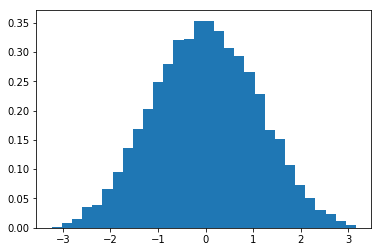

In [15]:
plt.hist(perm, density=True, bins=30)
plt.show()

$\textbf{e.}$ Calcule o valor-p do teste de permutação.

Lembre que:

* O teste é bicaudal de acordo com a hipótese alternativa ($H_A:\mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0$)
* Interessam os casos em que  $d_{obs} > 0$ , a proporção dos casos em que as diferenças entre as médias permutadas foram maiores do que a diferença  dobs  observada no item a
* Também interessam os casos em que  $d_{obs} < 0$ , ou seja, a proporção dos casos em que a as diferenças entre as médias permutadas foram menores do que a diferença dobs observada no item a
* Note que você não pode simplesmente calcular uma das duas caudas e dobrar o valor. **Por quê?**

Faça uma conclusão

In [16]:
# Jeito 1

p_direito = 1 - percentileofscore(perm, dobs)/100
p_esquerdo = percentileofscore(perm, -dobs)/100
p = p_direito + p_esquerdo
print(f"O valor p do teste é {round(p*100,3)}%.")

perm = array(perm)
print(f"Ocorreram {len(perm[perm>dobs])} casos em que as diferenças entre as médias permutadas foram maiores do que a diferença dobs.")
print(f"Ocorreram {len(perm[perm<dobs])} casos em que as diferenças entre as médias permutadas foram menores do que a diferença dobs.")

O valor p do teste é 2.375%.
Ocorreram 1157 casos em que as diferenças entre as médias permutadas foram maiores do que a diferença dobs.
Ocorreram 98843 casos em que as diferenças entre as médias permutadas foram menores do que a diferença dobs.


In [17]:
#Jeito 2:

perm = array(perm)

pvalue_dir = len(perm[perm > dobs])/len(perm)
pvalue_esq = len(perm[perm < -dobs])/len(perm)

p_total = pvalue_dir + pvalue_esq
print(f"O valor p do teste é {round(p_total*100,3)}%.")

O valor p do teste é 2.374%.


[Voltar para o sumário](#topo)

<a id = "section6"></a>

## 6. Regressão Linear - Aula 23

Usamos regressão linear para explicar como uma ou mais variáveis se comportam em função de outra. Há a variável dependente y (variável que buscamos explicar), a variável independente x (pode ser uma ou mais variáveis), que é utilizada para explicar a variável dependente e o modelo de regressão, dado por uma reta que associa y a um ou vários x.

Há dois modelos de regressão que podem ser seguidos: a simples (um y e um x) e a múltipla (um y e vários x)

<a id = "section6.1"></a>

### 6.1 Regressão Simples

A regressão simples segue o modelo
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_1} \bar{x}$$
onde $\hat{\beta_{1}}$ se dá pela fórmula
$$\hat{\beta_1}= \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})^2} = \frac{S_{xy}}{S_{xx}}$$

Estes valores também podem ser obtidos com uso da biblioteca `statsmodels`.

$\Large \textbf{Exemplo}$

$\large \textbf{APS 8 - Exercício 1}$

**b.** Agora use a biblioteca `statsmodels` para encontrar $\hat{\beta_0}$ e $\hat{\beta_1}$. Escreva a equação que estima *Condutividade termal* em função da *Densidade do produto*

In [18]:
condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]
y = array(condutividade)
densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]
x = array(densidade)
X = x
Y = y
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

c:\users\bruno domingues\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     275.8
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           7.70e-05
Time:                        00:26:30   Log-Likelihood:                 37.364
No. Observations:                   6   AIC:                            -70.73
Df Residuals:                       4   BIC:                            -71.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.002     13.959      0.000       0.020       0.030
x1             0.1285      0.008     16.608      0.000       0.107       0.150
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.411
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.541
Skew:                          -0.191   Prob(JB):                        0.763
Kurtosis:                       1.579   Cond. No.                         34.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
B0t = model.params[0]
B1t = model.params[1]

print(f'A equação que relaciona densidade e condutividade termal é dada por k = {B1t:0.3f}*d + {B0t:0.3f}.')

A equação que relaciona densidade e condutividade termal é dada por k = 0.129*d + 0.025.


<a id = "section6.2"></a>

### 6.2 Regressão Múltipla

A regressão múltipla é usada quando se tem mais de uma variável independente pata explicar a dependente. Ela segue o modelo
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_1} \bar{x_1} - \hat{\beta_2} \bar{x_2} - \hat{\beta_3} \bar{x_3} - ... - \hat{\beta_n} \bar{x_n} $$

Para aplicá-la, podemos usar novamente a biblioteca `statsmodels`.

$\Large \textbf{Exemplo}$

$\large \textbf{APS 8 - Exercício 2}$

Os dados abaixo são provenientes de uma pesquisa de satisfação aplicada em um hospital.

|Observation| Age| Severity| Surg_Med| Anxiety| Satisfaction|
|---|---|---|---|---|---|
|1|55|50| 0| 2.1| 68|
|2|46|24| 1| 2.8| 77|
|3|30|46| 1| 3.3| 96|
|4|35|48| 1| 4.5| 80|
|5|59|58| 0| 2.0| 43|
|6|61|60| 0| 5.1| 44|
|7|74|65| 1| 5.5| 26|
|8|38|42| 1| 3.2| 88|
|9 |27|42| 0| 3.1| 75|
|10|51|50 |1 |2.4 |57 |
|11|53|38 |1 |2.2 |56|
|12|41|30 |0 |2.1 |88|
|13|37|31 |0 |1.9 |88|
|14|24|34 |0 |3.1 |102|
|15|42|30 |0 |3.0 |88|
|16|50|48 |1 |4.2 |70|
|17|58|61 |1 |4.6 |52|
|18|60|71 |1 |5.3 |43|
|19|62|62 |0 |7.2 |46|
|20|68|38 |0 |7.8 |56|
|21|70|41 |1 |7.0 |59|
|22|79|66 |1 |6.2 |26|
|23|63|31 |1 |4.1 |52|
|24|39|42 |0 |3.5 |83|
|25|49|40 |1 |2.1 |75|

As variáveis são:

* `Age` - a idade do paciente
* `Severity` - quão severa é a condição. Valores mais altos indicam condição mais preocupante
* `Surg-Med` - Indica se é um paciente de visita ao médico `0` ou cirurgia `1`
* `Anxiety` - Índice de ansiedade. Valores mais elevados indicam maior ansiedade

Pede-se:

**a.** Encontre um modelo de regressão linear múltipla capaz de prever `Satisfaction` a partir da idade, severidade da condição e índice de ansiedade. Escreva a equação.

In [20]:
d = pd.read_csv("tabela_pacientes.csv")
df = pd.DataFrame(data=d)

varind = df[['Age','Anxiety','Severity']]
varind = sm.add_constant(varind)
vardep = df[['Satisfaction']]
modelo = sm.OLS(vardep, varind).fit()
predictions = modelo.predict(varind)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Satisfaction   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     65.55
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           7.85e-11
Time:                        00:26:30   Log-Likelihood:                -82.074
No. Observations:                  25   AIC:                             172.1
Df Residuals:                      21   BIC:                             177.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.8952      5.898     24.399      0.000     131.631     156.160
Age           -1.1135      0.133     -8.398      0.000      -1.389      -0.838
Anxiety        1.2962      1.056      1.227      0.233      -0.900       3.492
Severity      -0.5849      0.132     -4.430      0.000      -0.860      -0.310
==============================================================================
Omnibus:                        4.204   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.444
Skew:                          -0.672   Prob(JB):                        0.295
Kurtosis:                       3.733   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id = "section6.3"></a>

### 6.3 Dados da tabela

Pode-se notar que pudemos obter os coeficientes da equação obtida pela regressão pela tabela. Mas e os outros valores? O que indicam?

#### Prob(F-Statistic)

A $Prob(F-statistic)$ representa a probabilidade de todos os coeficientes do modelo serem iguais a zero. Quanto menor este valor for, menor a probabilidade.

#### P > |t|

$P > |t|$ indica o valor P da variável analisada, de modo que se este valor P for muito baixo, rejeita-se a hipótese $H_0: \hat{B_x} = 0$.

#### Pr(Omnibus) e Pr(JB)

Os valores $Pr(Omnibus)$ e $Pr(JB)$ indicam a probabilidade de que os erros residuais sigam uma distribuição normal. Visa-se no geral que estes valores estejam próximos de 1, uma vez que a regressão tem como base que os erros residuais seguem uma distribuição normal.

[Voltar para o sumário](#topo)

<a id = "links"></a>

## Links adicionais

* Markdown cheatsheet - https://github.com/tchapi/markdown-cheatsheet
* Omnibus test - https://en.wikipedia.org/wiki/Omnibus_test, https://stats.stackexchange.com/questions/59891/understanding-the-definition-of-omnibus-tests
* Why you need to check your residual plots - http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis
* Interpreting results from linear regression - https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate/, http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients, http://www.nlreg.com/results.htm
* Why do residuals need to be normal when using multi level modeling - https://www.researchgate.net/post/Why_do_the_residuals_need_to_be_normal_when_carrying_out_multi_level_modeling
* Documentação probplot - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
* Exemplo de regressão - https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
* Documentação statsmodels - https://www.statsmodels.org/stable/index.html

## Bibliografia

* Slides de aula
* Estatística Aplicada e Probabilidade para Engenheiros
* Noções de Probabilidade e Estatística